Mean redshift = 0.08744
Standard deviation = 0.03288
Redshift cut: [-0.01122, 0.18609]
Number of galaxies selected as cluster members: 234
Cluster redshift (z): 0.08610
Velocity dispersion: 9267.30 km/s
Cluster characteristic radius ≈ 1.520 Mpc
Dynamical Mass of the Cluster: 9.10e+13 M_sun
Estimated luminous mass: 3.87e+14 M_sun
Mass-to-light ratio: 0.235


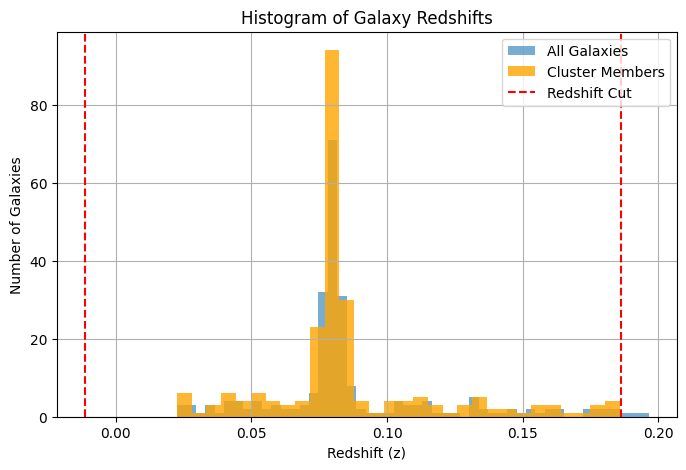

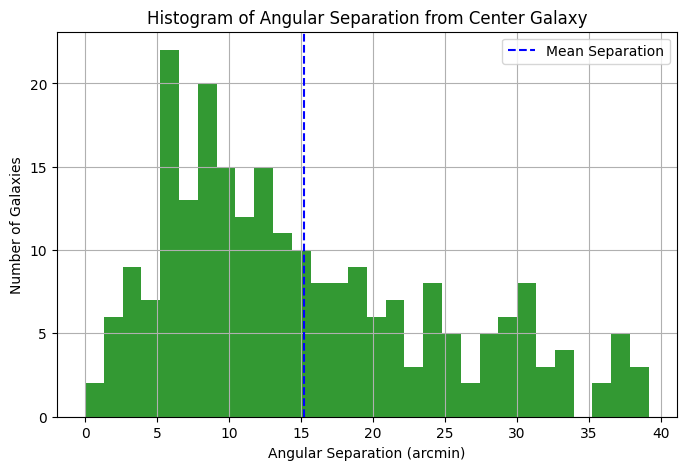

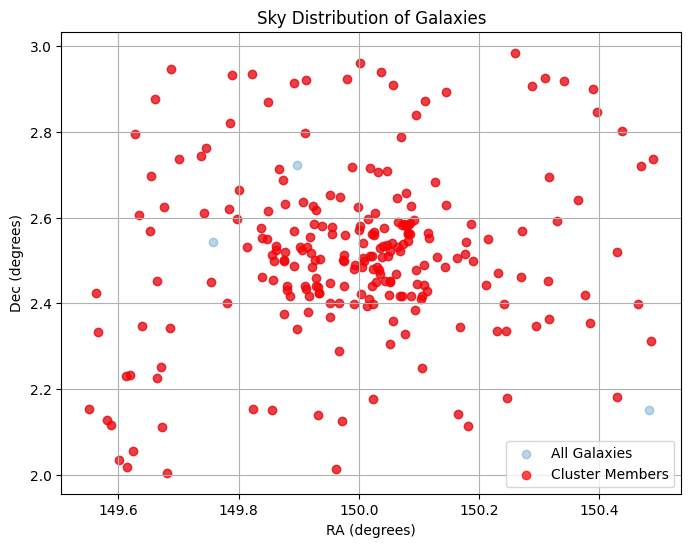

In [ ]:
# Galaxy Cluster Analysis with Simulated Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
from astropy.coordinates import SkyCoord
import astropy.units as u

# --- Step 0: Simulate galaxy data (cluster + background galaxies) ---

np.random.seed(42)  # For reproducibility

# Simulate 137 cluster members around z=0.08
cluster_redshifts = np.random.normal(loc=0.080, scale=0.003, size=137)
cluster_ra = np.random.normal(loc=150.0, scale=0.1, size=137)
cluster_dec = np.random.normal(loc=2.5, scale=0.1, size=137)

# Simulate 100 field galaxies (background/foreground)
field_redshifts = np.random.uniform(0.02, 0.2, size=100)
field_ra = np.random.uniform(149.5, 150.5, size=100)
field_dec = np.random.uniform(2.0, 3.0, size=100)

# Combine into a single dataset
ra_all = np.concatenate((cluster_ra, field_ra))
dec_all = np.concatenate((cluster_dec, field_dec))
z_all = np.concatenate((cluster_redshifts, field_redshifts))

df = pd.DataFrame({'RA': ra_all, 'Dec': dec_all, 'z': z_all})

# --- Step 1: Select cluster members based on redshift cut ---
mean_z = df['z'].mean()
std_z = df['z'].std()
z_lower = mean_z - 3 * std_z
z_upper = mean_z + 3 * std_z
cluster_members = df[(df['z'] >= z_lower) & (df['z'] <= z_upper)]
N_cluster = len(cluster_members)

print(f"Mean redshift = {mean_z:.5f}")
print(f"Standard deviation = {std_z:.5f}")
print(f"Redshift cut: [{z_lower:.5f}, {z_upper:.5f}]")
print(f"Number of galaxies selected as cluster members: {N_cluster}")

# --- Step 2: Compute cluster redshift and velocity dispersion ---
cluster_z = cluster_members['z'].mean()
c = 3e5  # Speed of light in km/s
sigma_z = cluster_members['z'].std()
velocity_dispersion = sigma_z * c

print(f"Cluster redshift (z): {cluster_z:.5f}")
print(f"Velocity dispersion: {velocity_dispersion:.2f} km/s")

# --- Step 3: Estimate cluster radius ---
coords = SkyCoord(ra=cluster_members['RA'].values*u.degree, dec=cluster_members['Dec'].values*u.degree)
angular_separations = coords.separation(coords[0])
mean_sep_rad = np.deg2rad(np.mean(angular_separations.deg))
D_A = cosmo.angular_diameter_distance(cluster_z).value  # Mpc
cluster_radius = D_A * mean_sep_rad  # Mpc

print(f"Cluster characteristic radius ≈ {cluster_radius:.3f} Mpc")

# --- Step 4: Estimate Dynamical Mass ---
G = 4.302e-6  # (km/s)^2 Mpc / M_sun
M_dyn = (3 * velocity_dispersion**2 * cluster_radius) / G
print(f"Dynamical Mass of the Cluster: {M_dyn:.2e} M_sun")

# --- Step 5: Compare with Luminous Mass ---
M_lum = 3.87e14  # Estimated luminous mass (in solar masses)
M_to_L = M_dyn / M_lum
print(f"Estimated luminous mass: {M_lum:.2e} M_sun")
print(f"Mass-to-light ratio: {M_to_L:.3f}")

# --- Plotting ---

# Histogram of Redshifts
plt.figure(figsize=(8, 5))
plt.hist(df['z'], bins=50, alpha=0.6, label='All Galaxies')
plt.hist(cluster_members['z'], bins=30, alpha=0.8, color='orange', label='Cluster Members')
plt.axvline(z_lower, color='red', linestyle='--', label='Redshift Cut')
plt.axvline(z_upper, color='red', linestyle='--')
plt.title("Histogram of Galaxy Redshifts")
plt.xlabel("Redshift (z)")
plt.ylabel("Number of Galaxies")
plt.legend()
plt.grid(True)
plt.show()

# Histogram of Angular Separation
plt.figure(figsize=(8, 5))
plt.hist(angular_separations.arcmin, bins=30, alpha=0.8, color='green')
plt.axvline(np.mean(angular_separations.arcmin), color='blue', linestyle='--', label='Mean Separation')
plt.title("Histogram of Angular Separation from Center Galaxy")
plt.xlabel("Angular Separation (arcmin)")
plt.ylabel("Number of Galaxies")
plt.legend()
plt.grid(True)
plt.show()

# Sky Map
plt.figure(figsize=(8, 6))
plt.scatter(df['RA'], df['Dec'], alpha=0.3, label='All Galaxies')
plt.scatter(cluster_members['RA'], cluster_members['Dec'], color='red', alpha=0.7, label='Cluster Members')
plt.xlabel("RA (degrees)")
plt.ylabel("Dec (degrees)")
plt.title("Sky Distribution of Galaxies")
plt.legend()
plt.grid(True)
plt.show()